# Part II: Network analysis

In this section we are going to anlyse three networks, specifically:
##### Bipartite Customers-Products network 
Nodes: each node corresponds to a product or a customer. Product nodes have the properties: category and title.
Edges: each edge connects a customer to a product if the customers has reviewed that product. The weight is equal to the rate. Edges have the verified property. 
##### Customers network
Nodes: each node corresponds to a customer. 
Edges: each edge connects two customer if they have bought at least one common product. The weight is equal to the number of common product divided by the rates difference.
##### Products network
Nodes: each node corresponds to a product. Nodes have the properties: category and title. 
Edges: each edge connect to product which have at least one customer in common who has review both. The weight is equal to number of different common customers.

## Preliminaries 

#### Importing libraries
In the code below we import all the libraries needed to execute the notebook.

In [1]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import pickle

### Loading files to create network aftewards
In the code below we define the path which has to be used to load pickle files needed for the network analysis. 

In [2]:
PATH_DATA = "V:/Programmazione/Amazon/"
df_no_text = pd.read_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA)

In [3]:
with open('%scustomersDict.pickle' %PATH_DATA, 'rb') as handleC:
    customersDict = pickle.load(handleC)

In [4]:
with open('%sproductsDict.pickle' %PATH_DATA, 'rb') as handleP:
    productsDict = pickle.load(handleP)

## Customers-Products network 

### Network creation
- Loading reviews file
- Customers-Products bipartite network creation
- Writing pickle file to store the Customers-Products network

In [9]:
gCP = nx.Graph()

In [10]:
for index, row in df_no_text.iterrows():
    gCP.add_node(row.customer_id, isCust = True)
    gCP.add_node(row.product_id, isCust = False, title = row.product_title, cat = row.product_category)
    gCP.add_edge(row.customer_id, row.product_id, weight = row.star_rating, verify = row.verified_purchase, date = row.review_date, id_rew = index)

In [ ]:
nx.write_gpickle(gCP, "%srawNetwork.gpickle" %PATH_DATA)

Loading the network from pickle file

In [16]:
gCP = nx.read_gpickle("%srawNetwork.gpickle" %PATH_DATA)

### First Customers-Products analysis 

#### Basic stats
- Nodes number
- Edges number
- Degree distribution

In [17]:
print("The number of nodes is: %d" %(len(gCP.nodes())))
print("The number of edges is: %d" %(len(gCP.edges())))

The number of nodes is: 994498
The number of edges is: 1704565


As we can seen by the results above, the bipartite Customers-Products netwokr is huge.

In [ ]:
# Degree distribution with plot
degrees = list()
for i in gCP:
    degrees.append(gCP.degree(i))
print("Max degree = " + str(max(degrees)))
print("Min degree = " + str(min(degrees)))

v, b = np.histogram(degrees, max(degrees))
v = np.append(v, 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Degree distribution linear')
plt.xlabel('k')
plt.ylabel('Count')
plt.plot(b, v, 'b.')
plt.show()
plt.title('Degree distribution log')
plt.xlabel('k')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.plot(b, v, 'bo')
plt.show()

In [ ]:
# Average shortest path lenght
nx.average_shortest_path_length(gCP)

# Average clustering coefficient
nx.average_clustering(gCP)

# Average degree connectivity
nx.average_degree_connectivity(gCP)

# Assorativity
nx.degree_assortativity_coefficient(gCP)

# Friendship paradox
isTrue = 0
for i in range(1000):
    node = np.random.choice(nx.nodes(gCP))
    if nx.average_neighbor_degree(gCP, nodes=[node])[node] > gCP.degree(node):
        isTrue += 1
print("The friendship paradox was true for " + str(isTrue) + " times out of 1000")

# Betweenness, eigenvector outgoing strenght
bc = nx.betweenness_centrality(gCP)
ec = nx.eigenvector_centrality(g)
for n in gCP:
    os[gCP.node[n]["Party"]].append(sum(gCP[e[0]][e[1]]["weight"] for e in gCP.edges(n)))
    
# Community and modularity
com = community.best_partition(gCP)
print("The modularity with python Louvain-algorithm implementation is %f" %(community.modularity(com, gCP)))

# Confusion matrix
D = [[0 for _ in range(max(com.values()) + 1)] for _ in range(2)]
for n in g:
    if g.node[n]["Party"] == "Democratic":
        D[0][com[n]] += 1
    else:
        D[1][com[n]] += 1
HIGHLIGHT = True #change this parameter (in False) if you want to highlight the more populated community (more then 10 members)
font = {'size'   : 9}
plt.rc('font', **font)
matrix = np.matrix(D)
plt.matshow(matrix, cmap = plt.cm.Blues)
for i in xrange(max(com.values()) + 1):
    if HIGHLIGHT or (matrix[0, i] + matrix[1, i]) > 10:
        for j in xrange(2):
            c = matrix[j, i]
            plt.text(i, j, str(c), va = 'center', ha = 'center')
plt.title('Confusion matrix', fontsize = 12)
plt.show()

## Customers network 

### Network creation
- Network computation
- Writing pickle file to store the network

In [55]:
gC = nx.Graph()

In [56]:
print(len(productsDict.items()))
count = 1
df_no_text.groupby("product_id").size().sort_values(ascending = False)

58618


product_id
B00FAPF5U0    7723
B008D30K7E    7638
B007ZXK08C    7273
B00E8KLWB4    6589
B00NOPQU2K    6307
B00QW8TYWO    5992
B007Z8ZKS2    5356
B00DJFIMW6    5311
B007L3BMGA    4863
B00YN6XHMU    4306
B00992CF6W    4263
B00I8Q77Y0    4260
B00DUGCLY4    4127
0099579936    3967
B0065GC0BA    3927
B00AREIAI8    3920
B00FZLFQ0I    3783
B00BQ4NLC8    3579
B00IG2DOKM    3468
B002RI9UBS    3353
B0078XHAB4    3298
B00D3NSDVO    2942
B0094BB4TW    2862
B004TSXUWY    2800
B0031R5K72    2681
B0090KZDSK    2678
B007TK77QE    2628
B006TF6WAM    2579
B00IK1J9QM    2570
B00D1VKZ3M    2523
              ... 
B001IB03IE       1
B001IBCRYW       1
B001IBG2OI       1
B001IBQ536       1
B001ICFE1E       1
B001I7BHNI       1
B001I5NTVS       1
B001I5KRZ4       1
B001I1RZBM       1
B001HXVJ8Q       1
B001HY5MYW       1
B001HY7C6S       1
B001HY8SPW       1
B001HYC9PM       1
B001HZK8FY       1
B001HZRL5E       1
B001I0N9U4       1
B001I10ABO       1
B001I2NEHA       1
B001I5CCUC       1
B001I3OY4G       1
B

In [30]:
for pr,customers  in productsDict.items():
    print("%d/58618" %(count))
    count += 1
    if len(customers) == 1:
        gC.add_node(customers[0])
    else:
        for i, (custIdI, revIdI) in enumerate(customers[:-1]):
            for custIdJ, revIdJ in customers[i+1:]:
                try:
                    gC[custIdI][custIdJ]["weight"] += 1.0 / (1 + abs(df_no_text.loc[revIdI].star_rating.item() - df_no_text.loc[revIdJ].star_rating.item()))
                except KeyError as e:
                    gC.add_edge(custIdI, custIdJ, weight = 1.0 / (1 + abs(df_no_text.loc[revIdI].star_rating.item() - df_no_text.loc[revIdJ].star_rating.item())))

1/58618
2/58618
3/58618
4/58618
5/58618
6/58618
7/58618
8/58618
9/58618
10/58618
11/58618
12/58618
13/58618
14/58618
15/58618
16/58618
17/58618
18/58618
19/58618
20/58618
21/58618
22/58618
23/58618
24/58618
25/58618
26/58618
27/58618
28/58618
29/58618
30/58618
31/58618
32/58618
33/58618
34/58618
35/58618
36/58618
37/58618
38/58618
39/58618
40/58618
41/58618
42/58618
43/58618
44/58618
45/58618
46/58618
47/58618
48/58618
49/58618
50/58618
51/58618
52/58618
53/58618
54/58618
55/58618
56/58618
57/58618
58/58618
59/58618
60/58618
61/58618
62/58618
63/58618
64/58618
65/58618
66/58618
67/58618
68/58618
69/58618
70/58618
71/58618
72/58618
73/58618
74/58618
75/58618
76/58618
77/58618
78/58618
79/58618
80/58618
81/58618
82/58618
83/58618
84/58618
85/58618
86/58618
87/58618
88/58618
89/58618
90/58618
91/58618
92/58618
93/58618
94/58618
95/58618
96/58618
97/58618
98/58618
99/58618
100/58618
101/58618
102/58618
103/58618
104/58618
105/58618
106/58618
107/58618
108/58618
109/58618
110/58618
111/5861

KeyboardInterrupt: 

In [ ]:
nx.write_gpickle(gCP, "%scustomersNetwork.gpickle" %PATH_DATA)

In [40]:
print(gC.nodes())

(2, 'due')


## Products network 

### Network creation
- Network computation
- Writing pickle file to store the network

In [23]:
gP = nx.Graph()

In [24]:
print(len(customersDict.items()))
count = 1

935880


In [25]:
for cu, pr in customersDict.items():
    if count%10000==0:
        print("%d/935880" %(count))
    count += 1
    if len(pr) == 1:
        gP.add_node(pr[0])
    else:
        for i, (prodIdI, revIdI) in enumerate(pr[:-1]):
            for prodIdJ, revIdJ in pr[i+1:]:
                try:
                    gP[prodIdI][prodIdJ]["weight"] += 1
                except KeyError as e:
                    gP.add_node(prodIdI, title = df_no_text.loc[revIdI].product_title, cat = df_no_text.loc[revIdI].product_category)
                    gP.add_node(prodIdJ, title = df_no_text.loc[revIdJ].product_title, cat = df_no_text.loc[revIdJ].product_category)
                    gP.add_edge(prodIdI, prodIdJ, weight = 1)

10000/935880
20000/935880
30000/935880
40000/935880
50000/935880


KeyboardInterrupt: 

In [77]:
nx.write_gpickle(gP, "%sproductsNetwork.gpickle" %PATH_DATA)

In [78]:
print("The number of nodes is %d" %len(gP.nodes()))
print("The number of edges is %d" %len(gP.edges()))

The number of nodes is 1705765
The number of edges is 7180524


In [15]:
customerNOfOrder = dict()
for key, value in customersDict.items():
    customerNOfOrder[len(value)] = customerNOfOrder.get(len(value), 0) + 1

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

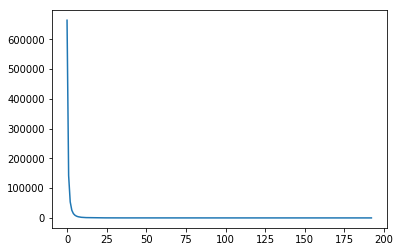

In [17]:
plt.plot(customerNOfOrder.values())
plt.show()

In [18]:
prec = 0
cumulative = list()
totOrders = 0.0
for key, value in customerNOfOrder.items():
    cumulative.append(value + prec)
    prec += value
    totOrders += value
cumulative = [value / totOrders for value in cumulative]

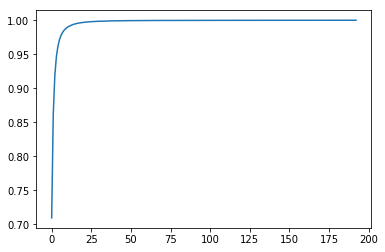

In [19]:
plt.plot(cumulative)
plt.show()